**Last 3 digit of ID:** 119

Now, (Last 3 digit of id%3) = 119%3 = 2. That means the dataset is: **Dataset 3**


Last (3 digit of id + dataset number)%5 = (119+3)%5 = 2.
That means Model is: **Bidirectional Lstm**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from scipy.spatial.distance import cdist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import os
import nltk
import string
import datetime
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.metrics import Metric
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

In [ ]:
DATA_PATH = '/content/drive/My Drive/Dataset 3.csv'
if not Path(DATA_PATH).is_file():
    gdd.download_file_from_google_drive(
        file_id='1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3',
        dest_path=DATA_PATH,
    )

In [ ]:
df = pd.read_csv(DATA_PATH, engine = 'python')
df

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [ ]:
nltk.download('stopwords')
english_stops = set(stopwords.words('english'))
nltk.download('punkt')
puncset = list(string.punctuation)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocessed(text):
  sentence = [lemmatizer.lemmatize(i, pos='v') for i in text.split() if i not in puncset and i not in english_stops]
  sentence = [w for w in sentence if w.isalpha()]
  return ' '.join(sentence)

In [ ]:
df['tweets'] = df.tweets.map(lambda x: preprocessed(x))

In [ ]:
df.tweets

0                                           real good miss
1                                               read manga
2                                                         
3          Need send accountant I even refer Those support
4                                                ADD ME ON
                               ...                        
10309    No Depression G Herbo mood do stress people de...
10310    What depression succumb brain make feel like n...
10311    Ketamine Nasal Spray Shows Promise Against Sui...
10312                        dont mistake bad day everyone
10313                                                     
Name: tweets, Length: 10314, dtype: object

In [ ]:
sentence_length = []
count = Counter()
for i in df.tweets:
  temp = i.split()
  sentence_length.append(len(temp))
  for j in temp:
    count[j] += 1

In [ ]:
num_words = len(count)
max_length = max(sentence_length)
print('num_words: ',num_words,' max_length: ',max_length)

num_words:  12895  max_length:  43


In [ ]:
from sklearn.model_selection import train_test_split
train_tweets,test_tweets,train_label,test_label=train_test_split(df['tweets'],df['sentiment'],test_size=0.20,random_state=1)

In [ ]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['tweets'])
word_index = tokenizer.word_index

In [ ]:
train_text = tokenizer.texts_to_sequences(train_tweets)
test_text = tokenizer.texts_to_sequences(test_tweets)

In [ ]:
train_padding = pad_sequences(
    train_text, maxlen=max_length, padding='post', truncating='post'
)
test_padding = pad_sequences(
    test_text, maxlen=max_length, padding='post', truncating='post'
)

In [ ]:
print(len(train_padding))
print(len(test_padding))

8251
2063


In [ ]:
#example
train_text[0]

[13, 1127, 3, 383, 411, 6657]

In [ ]:
#vocabulary
tokenizer.word_index

{'i': 1,
 'depression': 2,
 'get': 3,
 'go': 4,
 'good': 5,
 'love': 6,
 'like': 7,
 'make': 8,
 'day': 9,
 'know': 10,
 'think': 11,
 'see': 12,
 'time': 13,
 'thank': 14,
 'u': 15,
 'new': 16,
 'the': 17,
 'one': 18,
 'feel': 19,
 'lol': 20,
 'great': 21,
 'work': 22,
 'back': 23,
 'come': 24,
 'take': 25,
 'really': 26,
 'you': 27,
 'im': 28,
 'want': 29,
 'watch': 30,
 'happy': 31,
 'need': 32,
 'say': 33,
 'people': 34,
 'much': 35,
 'look': 36,
 'anxiety': 37,
 'today': 38,
 'hope': 39,
 'my': 40,
 'would': 41,
 'try': 42,
 'well': 43,
 'help': 44,
 'just': 45,
 'and': 46,
 'use': 47,
 'still': 48,
 'last': 49,
 'night': 50,
 'twitter': 51,
 'wait': 52,
 'even': 53,
 'haha': 54,
 'oh': 55,
 'never': 56,
 'life': 57,
 'way': 58,
 'gonna': 59,
 'give': 60,
 'better': 61,
 'it': 62,
 'nice': 63,
 'follow': 64,
 'morning': 65,
 'hey': 66,
 'do': 67,
 'right': 68,
 'find': 69,
 'everyone': 70,
 'fun': 71,
 'best': 72,
 'home': 73,
 'start': 74,
 'first': 75,
 'talk': 76,
 'let': 77,
 

In [ ]:
#Vocabulary_length
voc_length=len(tokenizer.word_index)
print(voc_length)

10510


In [ ]:
train_padding.shape

(8251, 43)

In [ ]:
test_padding.shape

(2063, 43)

In [ ]:
train_padding[0]

array([  13, 1127,    3,  383,  411, 6657,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [ ]:
test_padding[4]

array([   1, 3874,    1,   64,  143,   34,    1,   76,   70,   64,   76,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

***Inversse Tokenizer***

In [ ]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

In [ ]:
def tokens_to_string(tokens):
    # Map from tokens back to words.
    words = [inverse_map[token] for token in tokens if token != 0]
    
    # Concatenate all words.
    text = " ".join(words)

    return text

In [ ]:
train_text[0]

[13, 1127, 3, 383, 411, 6657]

In [ ]:
tokens_to_string(train_text[0])

'time taste get outside yet antonio'

In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

**Creating the Bidirectional LSTM Model**

In [ ]:
#creating the model

model = Sequential()
embedding_size = 128
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length= max_length,
                    name='layer_embedding'))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=METRICS)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 43, 128)           1650560   
_________________________________________________________________
bidirectional (Bidirectional (None, 43, 512)           788480    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 43, 256)           656384    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

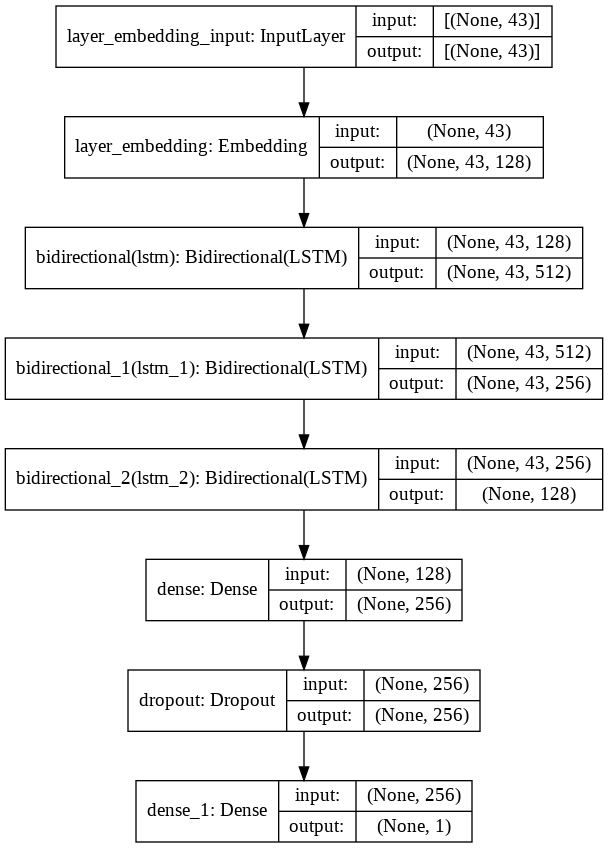

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
Epochs = 20
history = model.fit(
     train_padding, train_label, epochs=Epochs, verbose=2,
     batch_size=32,
     validation_data = (test_padding,test_label))

Epoch 1/20
258/258 - 204s - loss: 0.2221 - accuracy: 0.9234 - precision: 0.9488 - recall: 0.6977 - auc: 0.9329 - val_loss: 0.1552 - val_accuracy: 0.9467 - val_precision: 0.8758 - val_recall: 0.8835 - val_auc: 0.9716
Epoch 2/20
258/258 - 190s - loss: 0.0817 - accuracy: 0.9770 - precision: 0.9744 - recall: 0.9220 - auc: 0.9864 - val_loss: 0.1728 - val_accuracy: 0.9491 - val_precision: 0.8977 - val_recall: 0.8681 - val_auc: 0.9647
Epoch 3/20
258/258 - 190s - loss: 0.0473 - accuracy: 0.9862 - precision: 0.9850 - recall: 0.9532 - auc: 0.9948 - val_loss: 0.2378 - val_accuracy: 0.9447 - val_precision: 0.8831 - val_recall: 0.8637 - val_auc: 0.9576
Epoch 4/20
258/258 - 190s - loss: 0.0328 - accuracy: 0.9908 - precision: 0.9890 - recall: 0.9699 - auc: 0.9967 - val_loss: 0.1988 - val_accuracy: 0.9452 - val_precision: 0.8851 - val_recall: 0.8637 - val_auc: 0.9564
Epoch 5/20
258/258 - 190s - loss: 0.0236 - accuracy: 0.9930 - precision: 0.9929 - recall: 0.9758 - auc: 0.9985 - val_loss: 0.2573 - val_

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy     Val Loss      Val Accuracy
       1   0.222071 	   0.923403 	   0.155224 	   0.946680
       2   0.081704 	   0.976972 	   0.172778 	   0.949103
       3   0.047261 	   0.986183 	   0.237837 	   0.944741
       4   0.032817 	   0.990789 	   0.198772 	   0.945225
       5   0.023602 	   0.992971 	   0.257346 	   0.943771
       6   0.017592 	   0.994667 	   0.302552 	   0.944741
       7   0.014923 	   0.995758 	   0.322445 	   0.936500
       8   0.014791 	   0.996122 	   0.387662 	   0.940378
       9   0.017893 	   0.994425 	   0.300933 	   0.943286
      10   0.012636 	   0.996122 	   0.348306 	   0.942317
      11   0.011839 	   0.996485 	   0.474125 	   0.943771
      12   0.010221 	   0.997091 	   0.441402 	   0.941348
      13   0.007767 	   0.997334 	   0.595071 	   0.937954
      14   0.015810 	   0.995394 	   0.360533 	   0.941348
      15   0.016700 	   0.994425 	   0.385665 	   0.944741
      16   0.012807 	   0.996122 	   0.348771

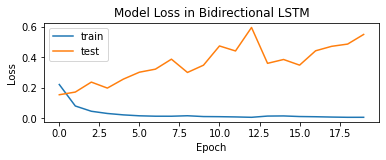

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Loss in Bidirectional LSTM')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/Loss_Bidirectional_Lstm.png')
pyplot.legend()
pyplot.show()

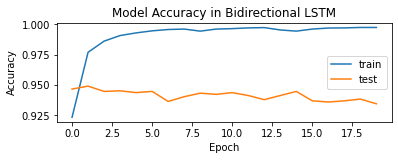

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.subplot(211)
pyplot.title('Model Accuracy in Bidirectional LSTM')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
Xception_train_accuracy = history.history['accuracy']
Xception_test_accuracy= history.history['val_accuracy']
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/Accuracy_Bidirectional_Lstm.png')
pyplot.legend()
pyplot.show()

In [ ]:
score = model.evaluate(test_padding,test_label)
print(" Total: ", len(test_padding))
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

65/65 [==============================] - 11s 166ms/step - loss: 0.5494 - accuracy: 0.9346 - precision: 0.8670 - recall: 0.8308 - auc: 0.9175
 Total:  2063

 Loss:  0.5493759512901306 
 Accuracy:  0.9345613121986389 
 Precision:  0.8669725060462952 
 Recall:  0.8307692408561707 
 F1-Score:  0.8484848676253122 
 AUC:  0.9174867868423462


In [ ]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['TruePositives','TrueNegatives','FalsePositives','FalseNegatives'])

history = model.fit(train_padding, train_label, epochs=1, verbose=2,batch_size=20, validation_data = (test_padding,test_label))

413/413 - 240s - loss: 0.0022 - true_positives: 1840.0000 - true_negatives: 6392.0000 - false_positives: 0.0000e+00 - false_negatives: 19.0000 - val_loss: 0.0623 - val_true_positives: 378.0000 - val_true_negatives: 1550.0000 - val_false_positives: 58.0000 - val_false_negatives: 77.0000


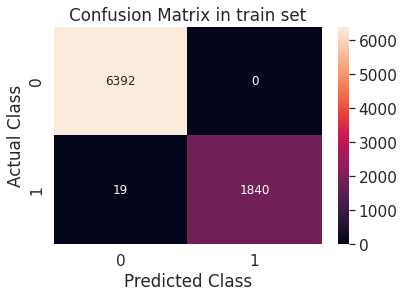

In [43]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[6392,0],
         [19,1840]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in train set')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_Bidirectional_Lstm_train.png')
pyplot.show()

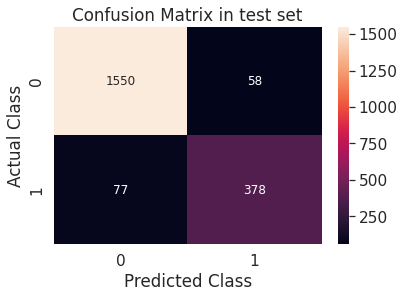

In [44]:
import matplotlib.pyplot as pyplot
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = [[1550,58],
         [77,378]]

df_cm = pd.DataFrame(array, range(2), range(2))

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt = 'g') # font size
pyplot.title('Confusion Matrix in test set')
pyplot.ylabel('Actual Class')
pyplot.xlabel('Predicted Class')
pyplot.savefig('/content/drive/My Drive/ConfusionMatrix_Bidirectional_Lstm_test.png')
pyplot.show()

***Predictions***

In [ ]:
y_pred = model.predict(x=test_padding[0:1000])
y_pred = y_pred.T[0]
cls_pred = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])
cls_true = np.array(test_label[0:1000])
incorrect = np.where(cls_pred != cls_true)
correct = np.where(cls_pred == cls_true)
incorrect = incorrect[0]
correct = correct[0]
print('\n')
print('Number of Mis-classified text in first 1000: ',len(incorrect),'\n')
print('Number of classified text in first 1000: ',len(correct),'\n')
idx = incorrect[0]
idx1 = correct[0]
print('First incorrect text index is: ',idx,'\n')
print('First correct text index is: ',idx1,'\n')
text = tokens_to_string(train_text[idx])
text1 = tokens_to_string(train_text[idx1])
print('First incorrect text is: ',text,'\n')
print('First correct text is: ',text1,'\n')
print('The predicted class for the first incorrect text is: ',y_pred[idx],'\n')
print('The actual class for the first incorrect text is: ',cls_true[idx],'\n')
print('The predicted class for the first correct text is: ',y_pred[idx1],'\n')
print('The actual class for the first correct text is: ',cls_true[idx1],'\n')



Number of Mis-classified text in first 1000:  68 

Number of classified text in first 1000:  932 

First incorrect text index is:  4 

First correct text index is:  0 

First incorrect text is:  maneater hysterical 

First correct text is:  time taste get outside yet antonio 

The predicted class for the first incorrect text is:  0.99996305 

The actual class for the first incorrect text is:  0 

The predicted class for the first correct text is:  0.99999666 

The actual class for the first correct text is:  1 

